In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hemendragandhi","key":"bd2d9f412f9fa72b4526c215ca75b768"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           4440  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    9MB  2021-03-01 08:19:18           2006  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            398  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            245  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

In [ ]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:04<00:00, 162MB/s]
100% 675M/675M [00:04<00:00, 151MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip -d ./malariadataset/

Streaming output truncated to the last 5000 lines.
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: ./malariadataset/cell_images/cell_images/Uninfected/C236

In [ ]:
import os
import glob

base_dir = os.path.join('./malariadataset/cell_images')
infected_dir=os.path.join(base_dir,'Parasitized')
uninfected_dir=os.path.join(base_dir,'Uninfected')

infected_files = glob.glob(infected_dir+'/*.png')
uninfected_files = glob.glob(uninfected_dir+'/*.png')
len(infected_files),len(uninfected_files)

(13779, 13779)

In [ ]:
import numpy as np
import pandas as pd
import cv2
np.random.seed(17)

In [ ]:
#Created dataset_df with labels and then shuffled our dataframe
dataset_df=pd.DataFrame({
    'dataset_name':infected_files+uninfected_files,
    'label':['malaria']*len(infected_files)+['uninfected']*len(uninfected_files)
}).sample(frac=1,random_state=17).reset_index(drop=True)

dataset_df.head()

,dataset_name,label
0,./malariadataset/cell_images/Uninfected/C213Th...,uninfected
1,./malariadataset/cell_images/Uninfected/C231Th...,uninfected
2,./malariadataset/cell_images/Parasitized/C174P...,malaria
3,./malariadataset/cell_images/Uninfected/C134P9...,uninfected
4,./malariadataset/cell_images/Uninfected/C180P1...,uninfected


Creating Test and Validation Datasets

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

train_data,test_data,train_labels,test_labels=train_test_split(dataset_df['dataset_name'].values,
                                                               dataset_df['label'].values,
                                                               train_size=0.7,random_state=17)
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,
                                                               train_size=0.9,random_state=17)
print(train_data.shape, val_data.shape, test_data.shape)
print('TrainData:', Counter(train_labels), '\nValData:', Counter(val_labels), '\nTestData:', Counter(test_labels))

(17361,) (1929,) (8268,)
TrainData: Counter({'uninfected': 8703, 'malaria': 8658}) 
ValData: Counter({'uninfected': 979, 'malaria': 950}) 
TestData: Counter({'malaria': 4171, 'uninfected': 4097})


Image dimension status

In [ ]:
import cv2

size_data=[cv2.imread(img).shape for img in train_data]
print('Max dimension of image: {}'.format(np.max(size_data,axis=0)))
print('Min dimension of image: {}'.format(np.min(size_data,axis=0)))
print('Mean dimension of image: {}'.format(np.mean(size_data,axis=0)))
print('Median dimension of image: {}'.format(np.median(size_data,axis=0)))

Max dimension of image: [385 265   3]
Min dimension of image: [46 58  3]
Mean dimension of image: [132.83687576 132.37860722   3.        ]
Median dimension of image: [130. 130.   3.]


Resizing images

In [ ]:
def resize_image(img):
  img=cv2.imread(img)
  img=cv2.resize(img,dsize=(125,125),interpolation=cv2.INTER_CUBIC)
  img = np.array(img, dtype=np.float32)
  return img

for i in range(len(train_data)):
  train_data[i]=resize_image(train_data[i])
train_data=np.asarray(list(train_data))

for i in range(len(test_data)):
  test_data[i]=resize_image(test_data[i])
test_data=np.asarray(list(test_data))

for i in range(len(val_data)):
  val_data[i]=resize_image(val_data[i])
val_data=np.asarray(list(val_data))

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(17361, 125, 125, 3)
(8268, 125, 125, 3)
(1929, 125, 125, 3)


Visulaizing random 16 images

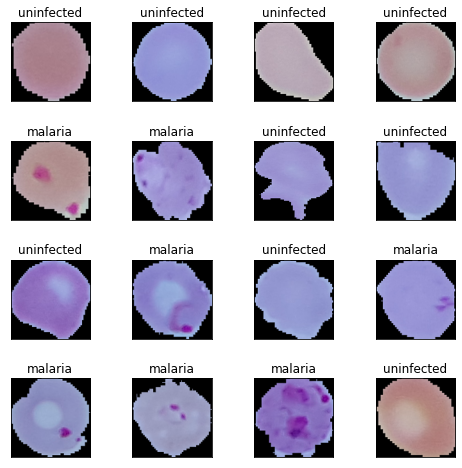

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(8,8))
n=0
for i in range(16):
  n+=1
  r=np.random.randint(0,train_data.shape[0],1)
  plt.subplot(4,4,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  plt.imshow(train_data[r[0]]/255.)
  plt.title(str(train_labels[r[0]]))
  plt.xticks([]),plt.yticks([])

HardCode batchsize, number of classes, epochs, inputshape and labelencode classes

In [ ]:
Batch_size=64
NumClasses=2
Epochs=25
Input_shape=(125,125,3)

train_data_scaled = train_data/255.
val_data_scaled = val_data/255.

# encode text category labels
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()
lab_enc.fit(train_labels)
train_label_enc=lab_enc.transform(train_labels)
val_label_enc=lab_enc.transform(val_labels)

print(train_labels[:5],train_label_enc[:5])

['uninfected' 'malaria' 'uninfected' 'malaria' 'malaria'] [1 0 1 0 0]


Importing TensorFlow

In [ ]:
import tensorflow as tf
tf.random.set_seed(17)
tf.__version__

'2.4.1'

**Creating our CNN model from scratch to compare with pretrained model VGG**

In [ ]:
inp = tf.keras.layers.Input(shape=Input_shape)

conv1 = tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(inp)

pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv1)

conv2= tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same')(pool1)

pool2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv2)

conv3= tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same')(pool2)

pool3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv3)

flat=tf.keras.layers.Flatten()(pool3)

hidden1 = tf.keras.layers.Dense(512,activation='relu')(flat)

drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)

hidden2= tf.keras.layers.Dense(512,activation='relu')(drop1)

drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out=tf.keras.layers.Dense(1,activation='sigmoid')(drop2)

model=tf.keras.Model(inputs=inp,outputs=out)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 125, 125, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0     

**Train Model**

In [ ]:
val_data_scaled.shape

(1929, 125, 125, 3)

In [ ]:
import datetime

logdir=os.path.join('./malariadataset',datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.000001)

callbacks = [reduce_lr, tensorboard_callback]

malaria_model = model.fit(x=train_data_scaled,
                          y=train_label_enc, batch_size=Batch_size,
                          epochs=Epochs,
                          validation_data=(val_data_scaled,val_label_enc),
                          callbacks=callbacks,
                          verbose=1)

Epoch 1/25
272/272 [==============================] - 536s 2s/step - loss: 0.6407 - accuracy: 0.6089 - val_loss: 0.1801 - val_accuracy: 0.9492
Epoch 2/25
272/272 [==============================] - 533s 2s/step - loss: 0.1888 - accuracy: 0.9393 - val_loss: 0.1483 - val_accuracy: 0.9585
Epoch 3/25
272/272 [==============================] - 534s 2s/step - loss: 0.1401 - accuracy: 0.9549 - val_loss: 0.1537 - val_accuracy: 0.9523
Epoch 4/25
272/272 [==============================] - 532s 2s/step - loss: 0.1116 - accuracy: 0.9651 - val_loss: 0.1428 - val_accuracy: 0.9611
Epoch 5/25
272/272 [==============================] - 533s 2s/step - loss: 0.0919 - accuracy: 0.9696 - val_loss: 0.1357 - val_accuracy: 0.9539
Epoch 6/25
272/272 [==============================] - 533s 2s/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.1338 - val_accuracy: 0.9528
Epoch 7/25
272/272 [==============================] - 532s 2s/step - loss: 0.0629 - accuracy: 0.9781 - val_loss: 0.1917 - val_accuracy: 0.9456

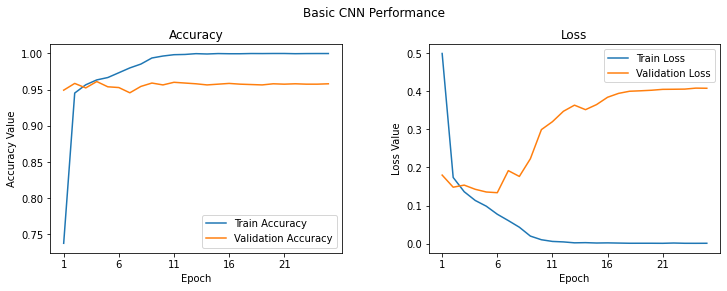

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(malaria_model.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, malaria_model.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, malaria_model.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, malaria_model.history['loss'], label='Train Loss')
ax2.plot(epoch_list, malaria_model.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [ ]:
model.save('cnn.h5')

NameError: ignored

In [ ]:
cnn = tf.keras.models.load_model('./cnn.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("cnn.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8vjuljrc/assets


60414044

In [ ]:
def prediction(img):
  img=cv2.imread(img)
  img=cv2.resize(img,dsize=(125,125),interpolation=cv2.INTER_CUBIC)
  img = np.array(img, dtype=np.float32)
  img_predict = np.asarray(img).reshape((-1, img.shape[0],img.shape[1] , img.shape[2]))
  img_predict_scaled=img_predict/255.
  preds = cnn.predict(img_predict_scaled,batch_size=1)
  print(lab_enc.inverse_transform([1 if preds.ravel()[0]>0.5 else 0]))

In [ ]:
files.upload()

Saving RealTimeSketch.ipynb to RealTimeSketch.ipynb


{'RealTimeSketch.ipynb': b'{\n "cells": [\n  {\n   "cell_type": "code",\n   "execution_count": 1,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "import cv2\\n",\n    "from matplotlib import pyplot as plt\\n",\n    "import numpy as np"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 2,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "def sketch(img):\\n",\n    "    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\\n",\n    "    img_gray_blur = cv2.GaussianBlur(img_gray, (7,7), 0)\\n",\n    "    img_canny = cv2.Canny(img_gray_blur, 10, 80)\\n",\n    "    _, mask = img_canny_inverted = cv2.threshold(img_canny, 30, 255, cv2.THRESH_BINARY_INV)\\n",\n    "    return mask"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 3,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "cam = cv2.VideoCapture(0)\\n",\n    "cv2.destroyAllWindows()\\n",\n    "\\n",\n    "while True:\\n",\n    "    _, img = cam.read()\\n",\n    "    fromCent

In [ ]:
prediction('./Malaria.png')

['malaria']


In [ ]:
test_data_scaled=test_data/255.

basic_cnn_preds = model.predict(test_data_scaled, batch_size=512)
basic_cnn_pred_labels = lab_enc.inverse_transform([1 if pred > 0.5 else 0 
                                                  for pred in basic_cnn_preds.ravel()])
from sklearn.metrics import precision_score
precision_score(basic_cnn_pred_labels, test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: ignored

Model 2: Tranfer Learning

Building model architecture VGG

Transfer learning is basically using pre-trained models for different classification for our purpose. For example VGG19 is trained on Imagenet dataset for image classification with a lot of diverse images. So this model would already have learned about a robust heirarchy of features like spatial, rotation, translation invariant with regard to features learned by CNN models. So this model can act as a good feature extractor for our purpose.

The last 3 layers in VGG19 are fully connected layers and each layer has 4096 units followed by a dense layer of 1000 units wherw each unit represents a category for image classification. SO we won't be needing that last 3 layers for our purpose. So we will be using our own fully connected dense layers to predict malaria.

Here we will use VGG19 just for feature extraction so we will freeze the 5 convolution blocks so that the weights wont get updatedafter each epoch. 

In [ ]:
vgg = tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=Input_shape)
vgg.trainable= False
#Freeze the layers

for layer in vgg.layers:
  layer.trainable=False

base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden_1 = tf.keras.layers.Dense(512,activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden_1)
hidden_2 = tf.keras.layers.Dense(512,activation='sigmoid')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden_2)

out = tf.keras.layers.Dense(1,activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=base_vgg.input,outputs=out)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

80142336/80134624 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 125, 125, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 125, 125, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 125, 125, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 62, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 62, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 62, 128)       147584    
______________________________________________________________

Code to get trainable layers that we will use for classification.
All the VGG19 layers will be used only for feature extraction.

In [ ]:
print('Total Trainable layers: '+str(len(model.layers)))
print("Total trainable layers:", sum([1 for l in model.layers if l.trainable]))

Total Trainable layers: 28
Total trainable layers: 6


In [ ]:
history =  model.fit(x=train_data_scaled,
                          y=train_label_enc, batch_size=Batch_size,
                          epochs=Epochs,
                          validation_data=(val_data_scaled,val_label_enc),
                          verbose=1)

Epoch 1/25
272/272 [==============================] - 37s 104ms/step - loss: 0.4981 - accuracy: 0.7445 - val_loss: 0.3162 - val_accuracy: 0.8507
Epoch 2/25
272/272 [==============================] - 28s 103ms/step - loss: 0.2977 - accuracy: 0.8734 - val_loss: 0.2321 - val_accuracy: 0.9088
Epoch 3/25
272/272 [==============================] - 29s 106ms/step - loss: 0.2574 - accuracy: 0.8945 - val_loss: 0.2807 - val_accuracy: 0.8808
Epoch 4/25
272/272 [==============================] - 30s 111ms/step - loss: 0.2381 - accuracy: 0.9054 - val_loss: 0.2581 - val_accuracy: 0.9041
Epoch 5/25
272/272 [==============================] - 30s 110ms/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.2258 - val_accuracy: 0.9077
Epoch 6/25
272/272 [==============================] - 29s 108ms/step - loss: 0.2208 - accuracy: 0.9166 - val_loss: 0.1834 - val_accuracy: 0.9311
Epoch 7/25
272/272 [==============================] - 30s 110ms/step - loss: 0.2047 - accuracy: 0.9224 - val_loss: 0.2279 - val_ac

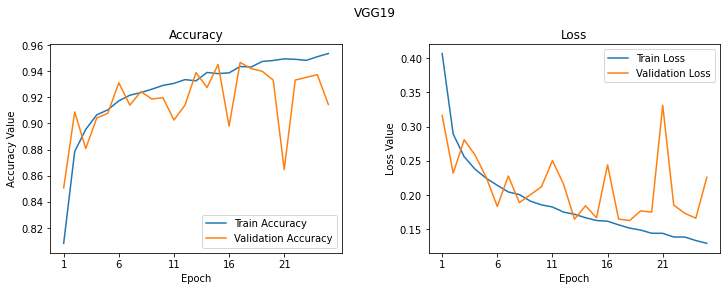

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('vgg_frozen.h5')

**Fine-tuned model with pre-trained model with Image Augmentation**

Here, we will fine-tune the weights of the layers present in the last two blocks of our pre-trained VGG-19 model. Aside from that we will do image augmentation i.e. we will perform random tranformations, rotations, zooming, etc to images so we won't get the same image twice.

In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 zoom_range = 0.05,
                                                                 rotation_range = 25,
                                                                 width_shift_range = 0.05,
                                                                 height_shift_range = 0.05,
                                                                 shear_range = 0.05,
                                                                 horizontal_flip = True,
                                                                 fill_mode = 'nearest')

val_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Labels:  ['uninfected', 'uninfected', 'uninfected', 'uninfected', 'uninfected']


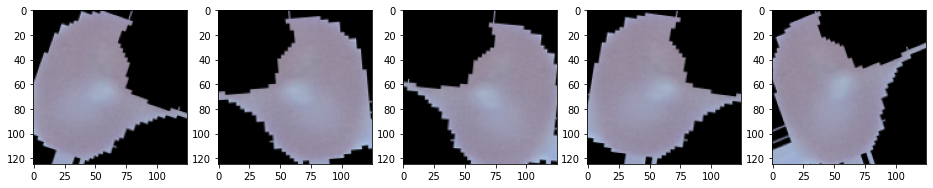

In [ ]:
img_id = 0
sample_aug = train_data_aug.flow(train_data[img_id:img_id+1], train_labels[img_id:img_id+1], batch_size= 1)
sample = [next(sample_aug) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels: ', [item[1][0] for item in  sample])
l = [ax[i].imshow(sample[i][0][0]) for i in range(5)]

You can clearly see the changes in each tranformation of the same image

In [ ]:
#build image augmentors

train_gen = train_data_aug.flow(train_data, train_label_enc, batch_size= Batch_size, shuffle = True)
val_gen = val_data_aug.flow(val_data, val_label_enc, batch_size= Batch_size, shuffle = False)

Model Architecture: Make last 2 layers of VGG19 trainable

In [ ]:
vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet',input_shape=Input_shape)
vgg.trainable = True
set_trainable= False
for layer in vgg.layers:
  if layer.name in ['block5_conv1','block4_conv1']:
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden_1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate = 0.3)(hidden_1)
hidden_2 = tf.keras.layers.Dense(512,activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden_2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs = base_vgg.input, outputs =out)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 1e-5),
              loss = 'binary_crossentropy',
              metrics= ['accuracy'])

print('Total layers: ', len(model.layers))
print(' Total trainable layers: ',sum([1 for l in model.layers if l.trainable]))


Total layers:  28
 Total trainable layers:  16


Train model

We train our model, but we reduce our learning rate since we don't want to make large weight updates to the pre-trained layers when fine-tuning. The training process will be slightly dfferent since we are using image generators and hence here we will use model.fit_generator instead of model.fit

In [ ]:
train_steps_per_epoch = train_gen.n // train_gen.batch_size
val_steps_per_epoch = val_gen.n // val_gen.batch_size

history = model.fit_generator(train_gen,steps_per_epoch=train_steps_per_epoch,epochs=Epochs,
                              validation_data = val_gen, validation_steps = val_steps_per_epoch,
                              verbose = 1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
271/271 [==============================] - 84s 274ms/step - loss: 0.3392 - accuracy: 0.8398 - val_loss: 0.1383 - val_accuracy: 0.9526
Epoch 2/25
271/271 [==============================] - 74s 272ms/step - loss: 0.1344 - accuracy: 0.9567 - val_loss: 0.1105 - val_accuracy: 0.9594
Epoch 3/25
271/271 [==============================] - 74s 272ms/step - loss: 0.1185 - accuracy: 0.9590 - val_loss: 0.1044 - val_accuracy: 0.9656
Epoch 4/25
271/271 [==============================] - 74s 273ms/step - loss: 0.1172 - accuracy: 0.9617 - val_loss: 0.1114 - val_accuracy: 0.9589
Epoch 5/25
271/271 [==============================] - 74s 273ms/step - loss: 0.1105 - accuracy: 0.9637 - val_loss: 0.1015 - val_accuracy: 0.9651
Epoch 6/25
271/271 [==============================] - 74s 272ms/step - loss: 0.1081 - accuracy: 0.9613 - val_loss: 0.1079 - val_accuracy: 0.9641
Epoch 7/25
271/271 [==============================] - 74s 272ms/step - loss: 0.1022 - accuracy: 0.9664 - val_loss: 0.1200 - val_ac

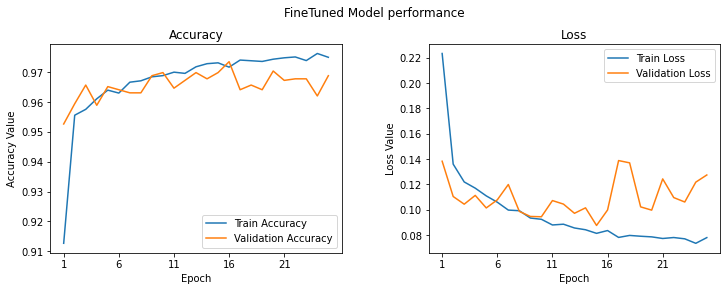

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('FineTuned Model performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

This is our best model yet it is giving accuracy of 97.49%, it does'nt look like our model is overfitting as much our first model and that is evident from the graphs.

In [ ]:
model.save('finetuned_vgg.h5')

In [ ]:
from google.colab import files
files.upload()

Saving model_evaluation_utils.py to model_evaluation_utils.py


{'model_evaluation_utils.py': b'\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en" >\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-vlkJnxjyyISVRjmQMRMTjnlGR2Q2O0qX16yjeOM6QiAfeL981pfcjzyFCZWkXe65y6CivHbGsaIiyyE3Ec1Oig==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-be59099f18f2c884954639903113138e.css" />\n  <link crossorigin="anonymous" media="all" integrity="sha512-MrD6XZweRyZEIENYNDe6UFP7BtKwlyuMj/ALN7d0zqeVUAAc59YsMwmvFe57r3fBbMHodQ13Icvq8TTW1Z6Uwg==" rel="stylesheet" href="https://github.githubassets.com/assets/site-32b0fa5d9c1e4726442043583437ba50.css" />\n    <link crossorigin="anonymous" media="all" integri

In [ ]:
test_imgs_scaled = test_data / 255.
test_imgs_scaled.shape, test_labels.shape

((8268, 125, 125, 3), (8268,))

In [ ]:
cnn = tf.keras.models.load_model('./cnn.h5')
cnn_preds = cnn.predict(test_imgs_scaled, batch_size=512)
cnn_pred_labels = le.inverse_transform([1 if pred > 0.5 else 0 
                                                  for pred in cnn_preds.ravel()])

In [ ]:
vgg_frz = tf.keras.models.load_model('./vgg_frozen.h5')
vgg_frz_preds = vgg_frz.predict(test_imgs_scaled, batch_size=512)
vgg_frz_pred_labels = le.inverse_transform([1 if pred > 0.5 else 0 
                                                  for pred in vgg_frz_preds.ravel()])

In [ ]:
vgg_ft = tf.keras.models.load_model('./finetuned_vgg.h5')
vgg_ft_preds = vgg_ft.predict(test_imgs_scaled, batch_size=512)
vgg_ft_pred_labels = le.inverse_transform([1 if pred > 0.5 else 0 
                                                  for pred in vgg_ft_preds.ravel()])